## Wearable Tech: Week 3 Assignment

### Step 1

In [50]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from datetime import datetime
import plotly.graph_objects as go

df = pd.read_csv("../Data/WBBtotal.csv", index_col =["Timestamp"], parse_dates=["Timestamp"])

### Step 2

In [51]:
# Copy read df
um = df.copy()[['Seconds', 'Heart Rate', 'Player Load', 'AthleteID']]

### Step 3

In [52]:
um = um.loc['2019-03-09']

### Step 4

In [53]:
(um['Heart Rate']==0).count()

1477112

### Step 5

In [54]:
um[um['Heart Rate']==0].groupby('AthleteID')['Heart Rate'].count().sort_values()

AthleteID
Athlete 7      1751
Athlete 4      2920
Athlete 1      3001
Athlete 8      3590
Athlete 12     4632
Athlete 6      4717
Athlete 2      4758
Athlete 5      5475
Athlete 9      5703
Athlete 3      6732
Athlete 13     7848
Athlete 11     8293
Athlete 10    10032
Name: Heart Rate, dtype: int64

### Step 6

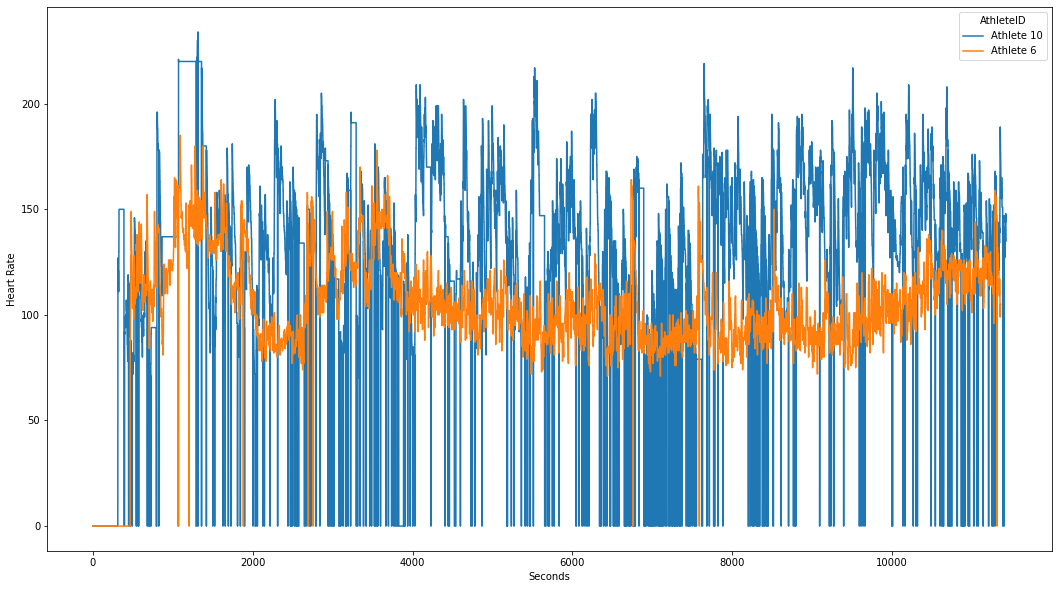

In [55]:
um.groupby('AthleteID')['Player Load'].mean().sort_values()  # Athlete 10 and 6
pl = um[(um['AthleteID']=='Athlete 10') | (um['AthleteID']=='Athlete 6')].reset_index()

sns.lineplot(x='Seconds', y='Heart Rate', data=pl, hue='AthleteID')
plt.gcf().set_size_inches(18,10)

### Step 7

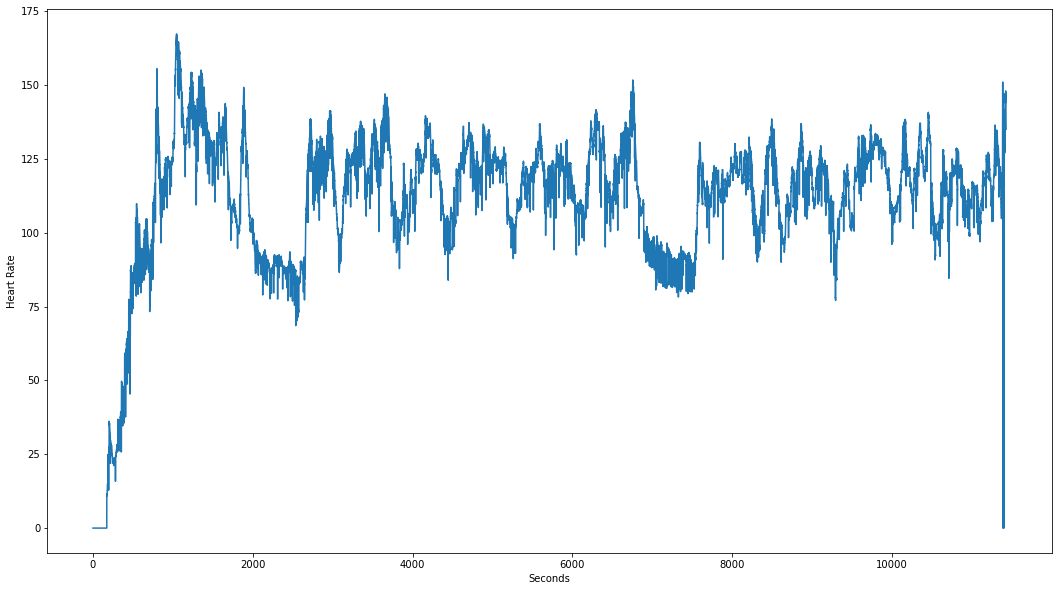

In [56]:
# Raw Data
pl = um.groupby('Seconds', as_index=False)[['Seconds','Heart Rate','Player Load']].mean()

sns.lineplot(x='Seconds', y='Heart Rate', data=pl)
plt.gcf().set_size_inches(18,10)

In [68]:
7000/60

116.66666666666667

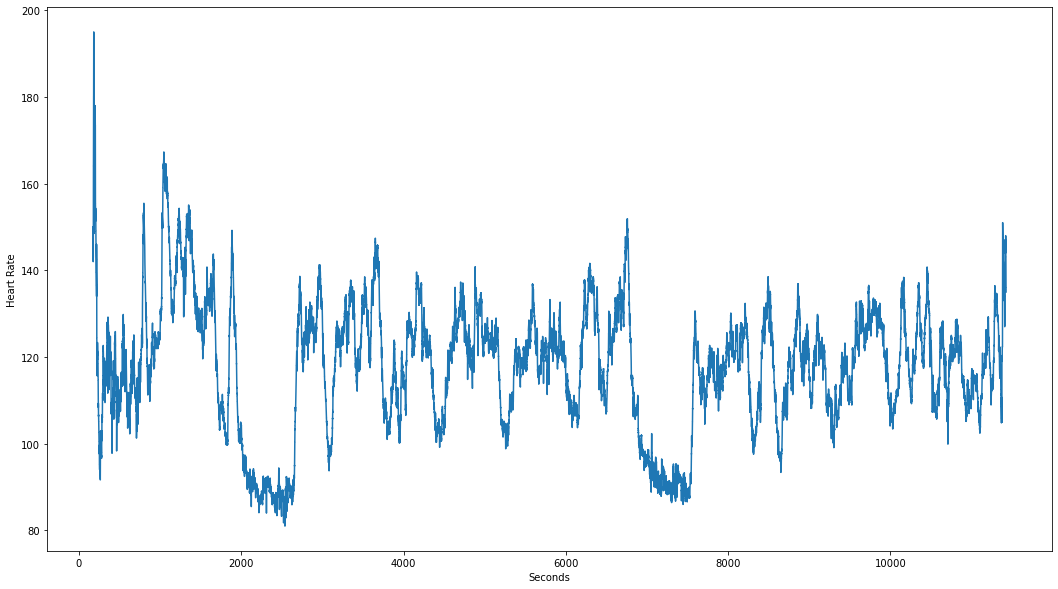

In [61]:
# Cleaned Data
pl = um[(um!=0).all(axis=1)]
pl = pl.groupby('Seconds', as_index=False)[['Seconds','Heart Rate','Player Load']].mean()

sns.lineplot(x='Seconds', y='Heart Rate', data=pl)
plt.gcf().set_size_inches(18,10)

### Step 8


In [66]:
p_hr = um.groupby('AthleteID').mean()

# t = um.Seconds.max() / 60.0
t = 12000/60
HRmax = 200
HRrest = 60
FHRR = (p_hr['Heart Rate']-HRrest) / (HRmax-HRrest)

TRIMP = t * FHRR * np.exp(1.67 * FHRR)
TRIMP.name = 'TRIMP'
TRIMP

AthleteID
Athlete 1     292.868980
Athlete 10    237.314641
Athlete 11     94.755885
Athlete 12     51.799503
Athlete 13     98.720122
Athlete 2     152.466253
Athlete 3      56.667355
Athlete 4      41.296118
Athlete 5     209.647213
Athlete 6     103.667722
Athlete 7     286.148526
Athlete 8     127.874706
Athlete 9     270.396474
Name: TRIMP, dtype: float64

### Step 9

In [67]:
display(p_hr['Player Load'].sort_values(ascending=False).iloc[:5])
display(TRIMP.sort_values(ascending=False).iloc[:5])

AthleteID
Athlete 10    495.154418
Athlete 7     436.684234
Athlete 1     434.664178
Athlete 9     393.610484
Athlete 5     385.821626
Name: Player Load, dtype: float64

AthleteID
Athlete 1     292.868980
Athlete 7     286.148526
Athlete 9     270.396474
Athlete 10    237.314641
Athlete 5     209.647213
Name: TRIMP, dtype: float64

In [72]:
(um['Heart Rate']==0.0).sum()
# Q1: 70,000
# Q2: Athlete 10
# Q3: 120 minutes
# Q4: Athlete 5
# Q5: Athlete 7

69452